# Lemniscate Splitting Demo

This notebook builds a figure-eight factor graph using `FGBuilder.create_leminscate_graph`
and inspects the loop structure around the shared center variable.


In [4]:
from propflow.utils import FGBuilder
from propflow.configs import create_random_int_table

NUM_VARS = 7
DOMAIN = 10
CT_PARAMS = {"low": 1, "high": 99999}

lemniscate_fg = FGBuilder.create_leminscate_graph(
    num_vars=NUM_VARS,
    domain_size=DOMAIN,
    ct_factory=create_random_int_table,
    ct_params=CT_PARAMS,
)
lemniscate_fg


Variables: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
Factors: ['f12', 'f23', 'f34', 'f41', 'f15', 'f56', 'f67', 'f71']
Center node: x1
Center degree: 4


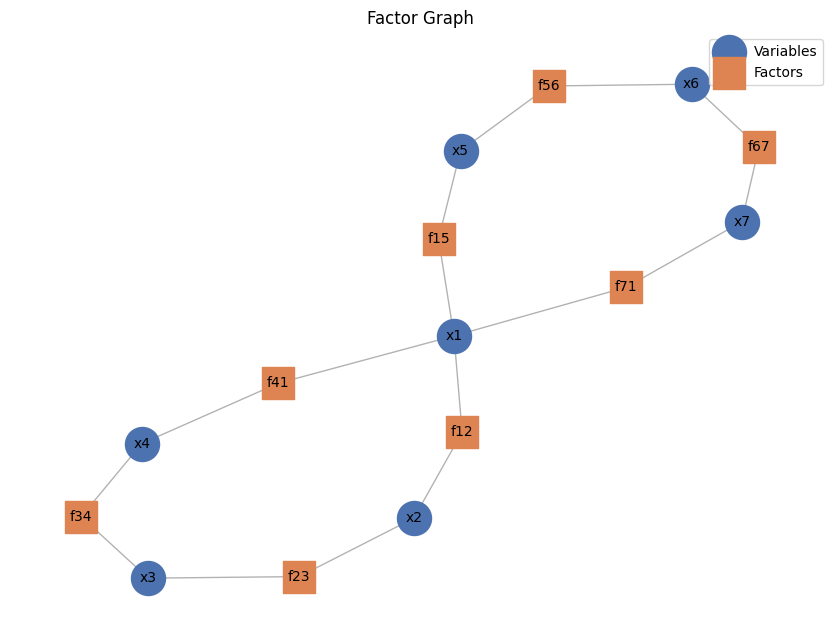

In [2]:
center = lemniscate_fg.variables[0]
var_names = [var.name for var in lemniscate_fg.variables]
factor_names = [fac.name for fac in lemniscate_fg.factors]
center_degree = len([vars_list for vars_list in lemniscate_fg.edges.values() if center in vars_list])

print(f"Variables: {var_names}")
print(f"Factors: {factor_names}")
print(f"Center node: {center.name}")
print(f"Center degree: {center_degree}")
lemniscate_fg.visualize(pretty=True)



/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:1001: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:1107: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:1001: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:1107: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:361: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/sna

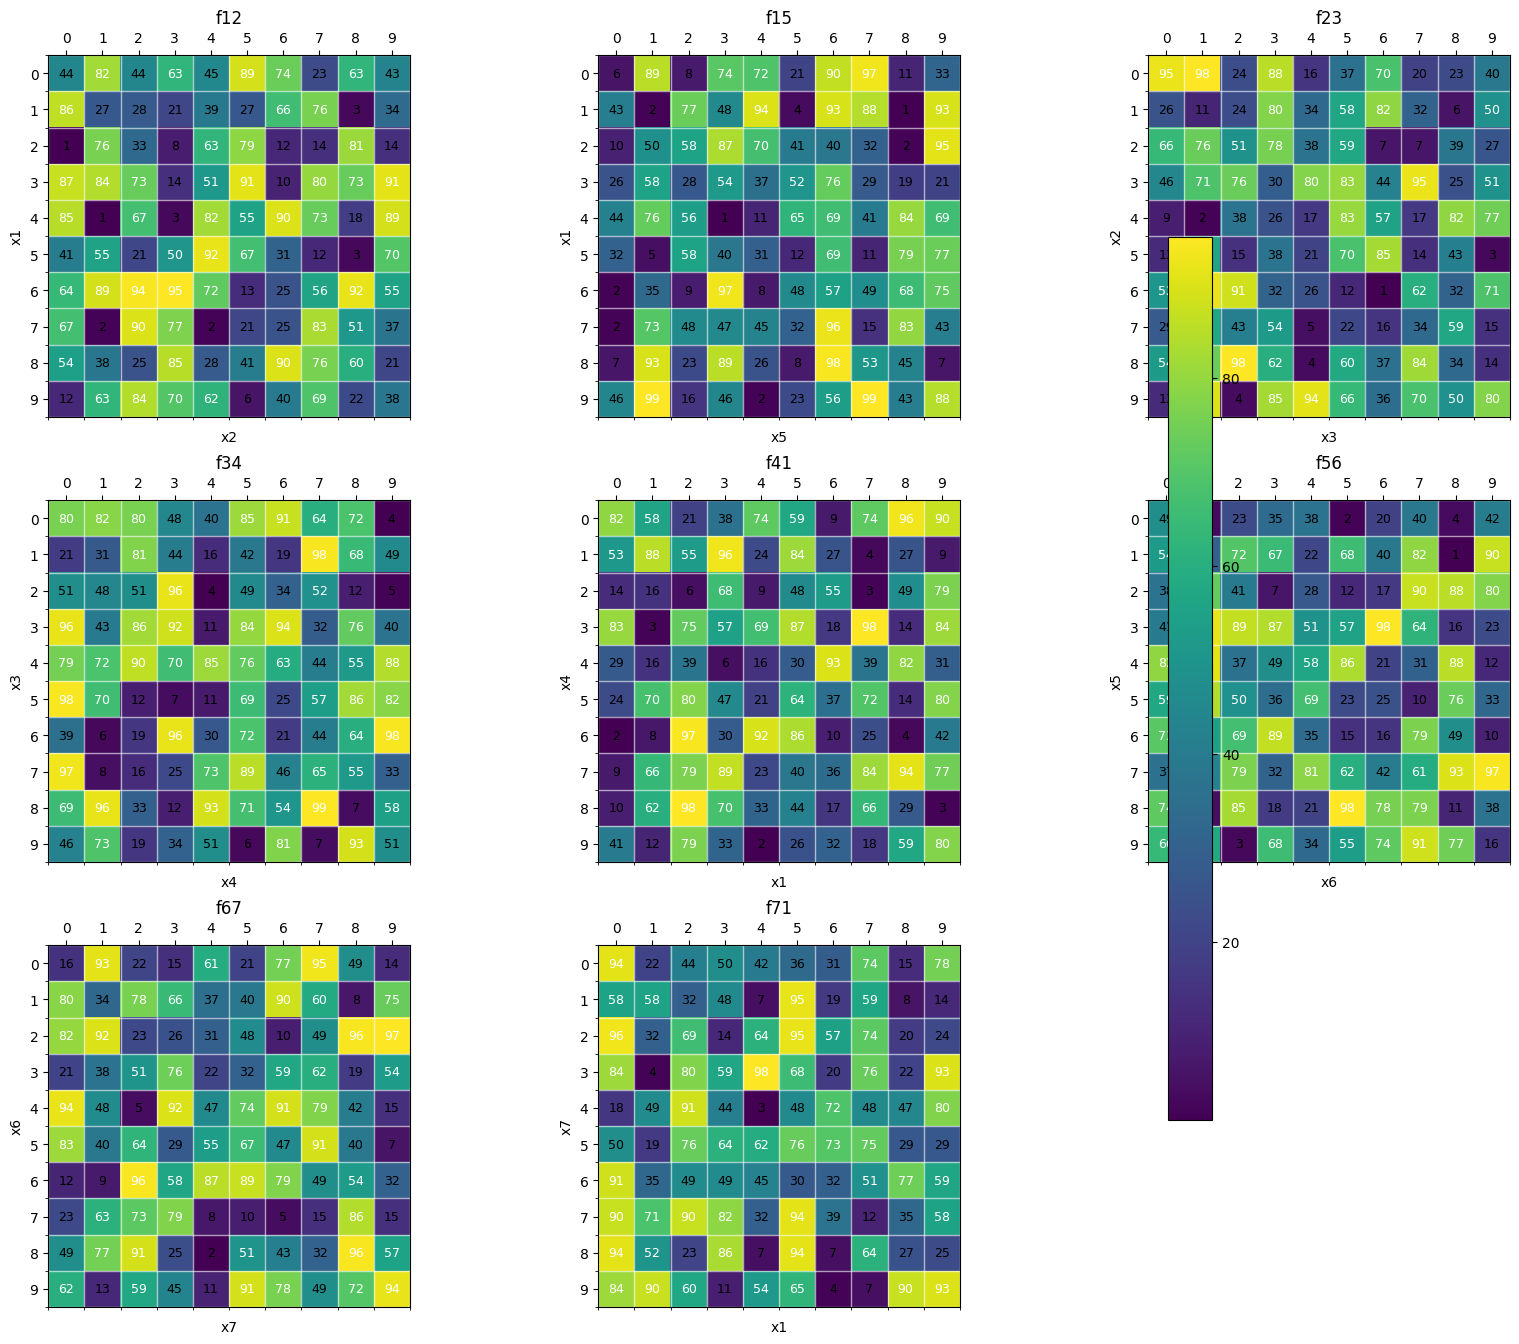

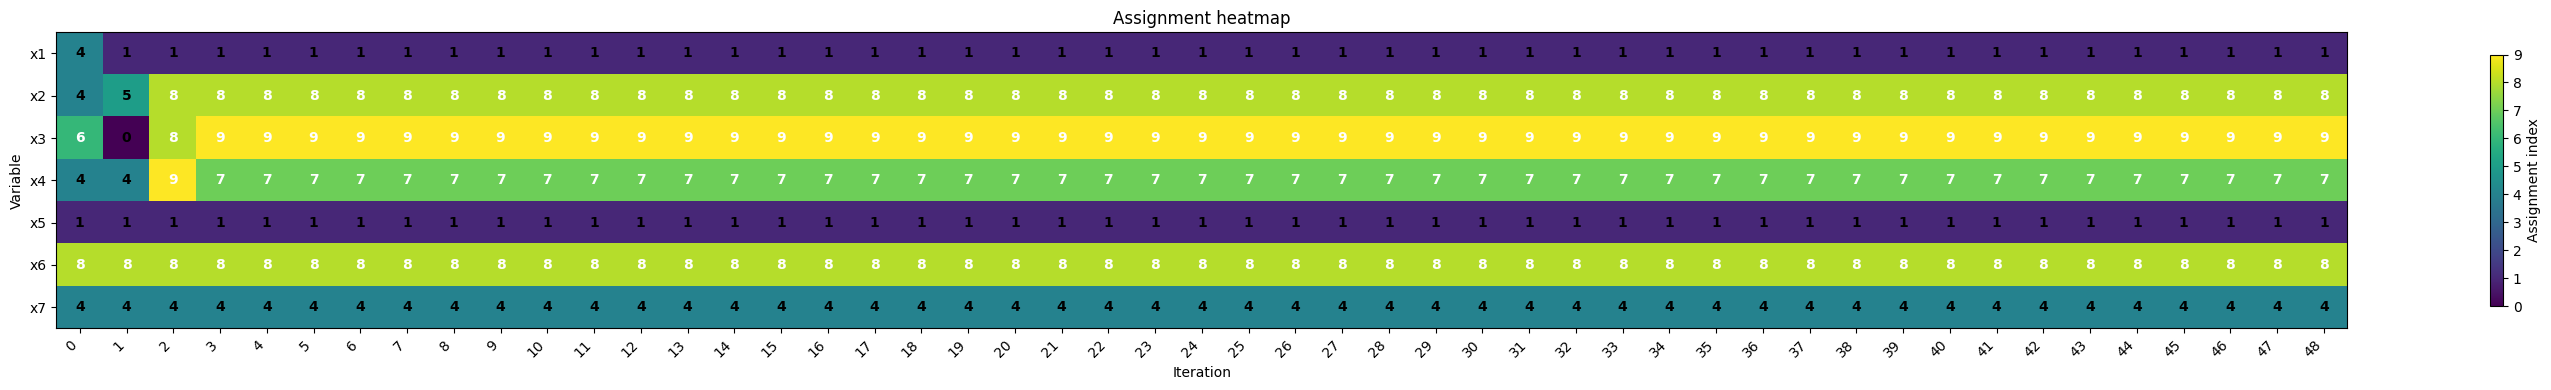

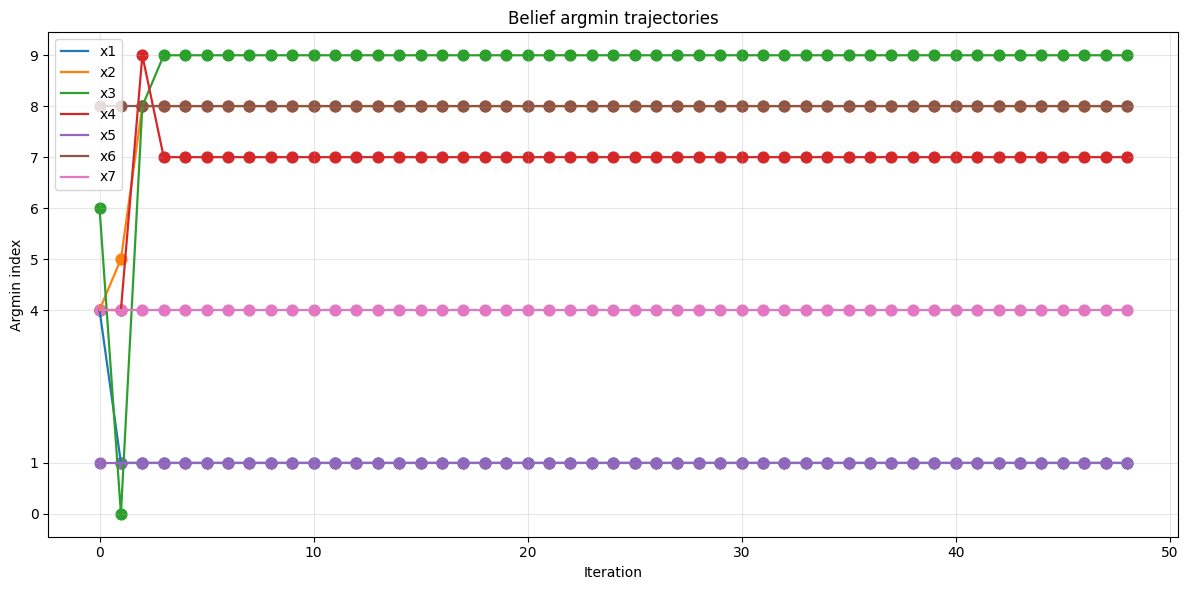

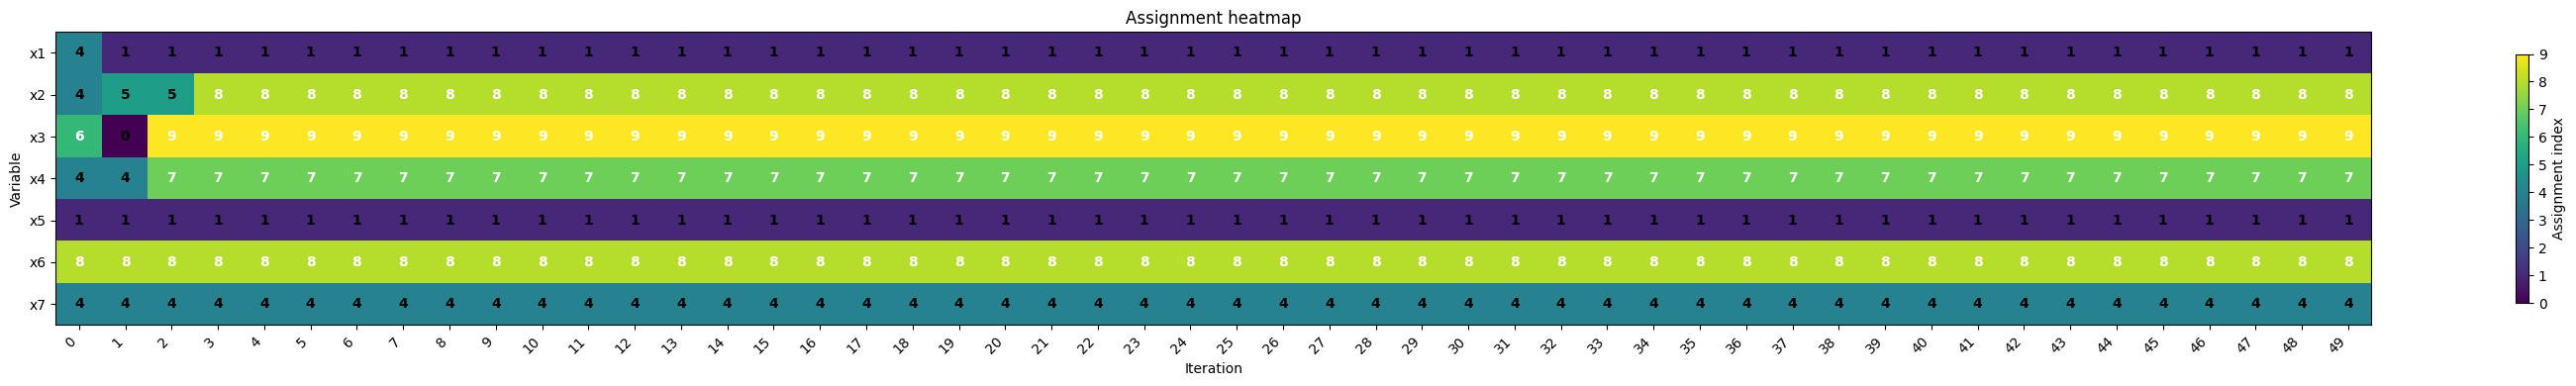

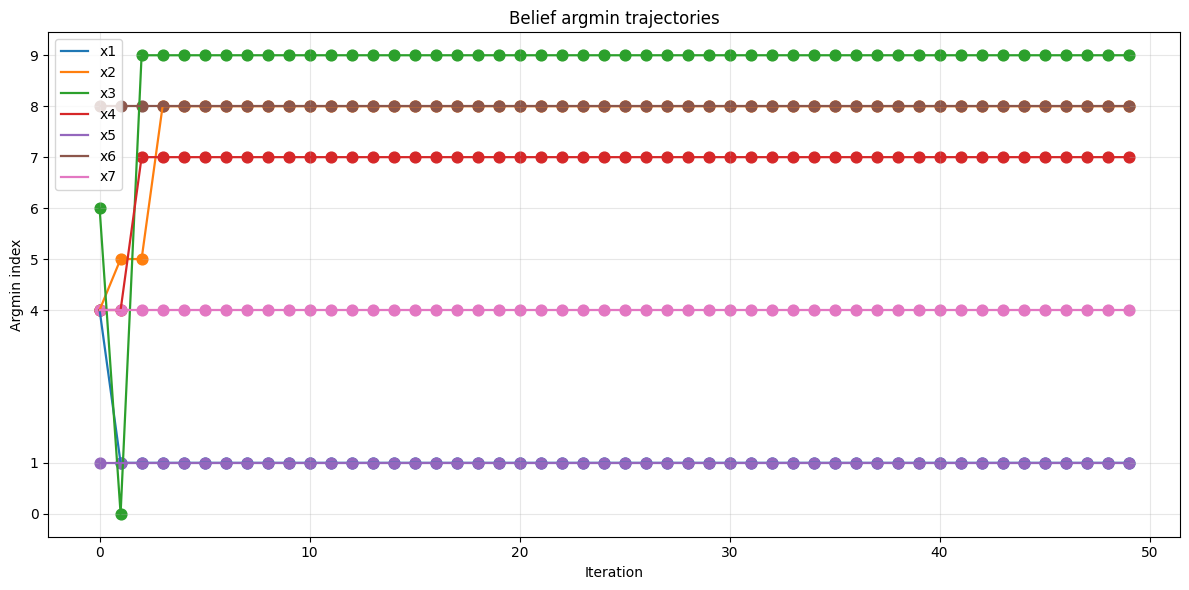

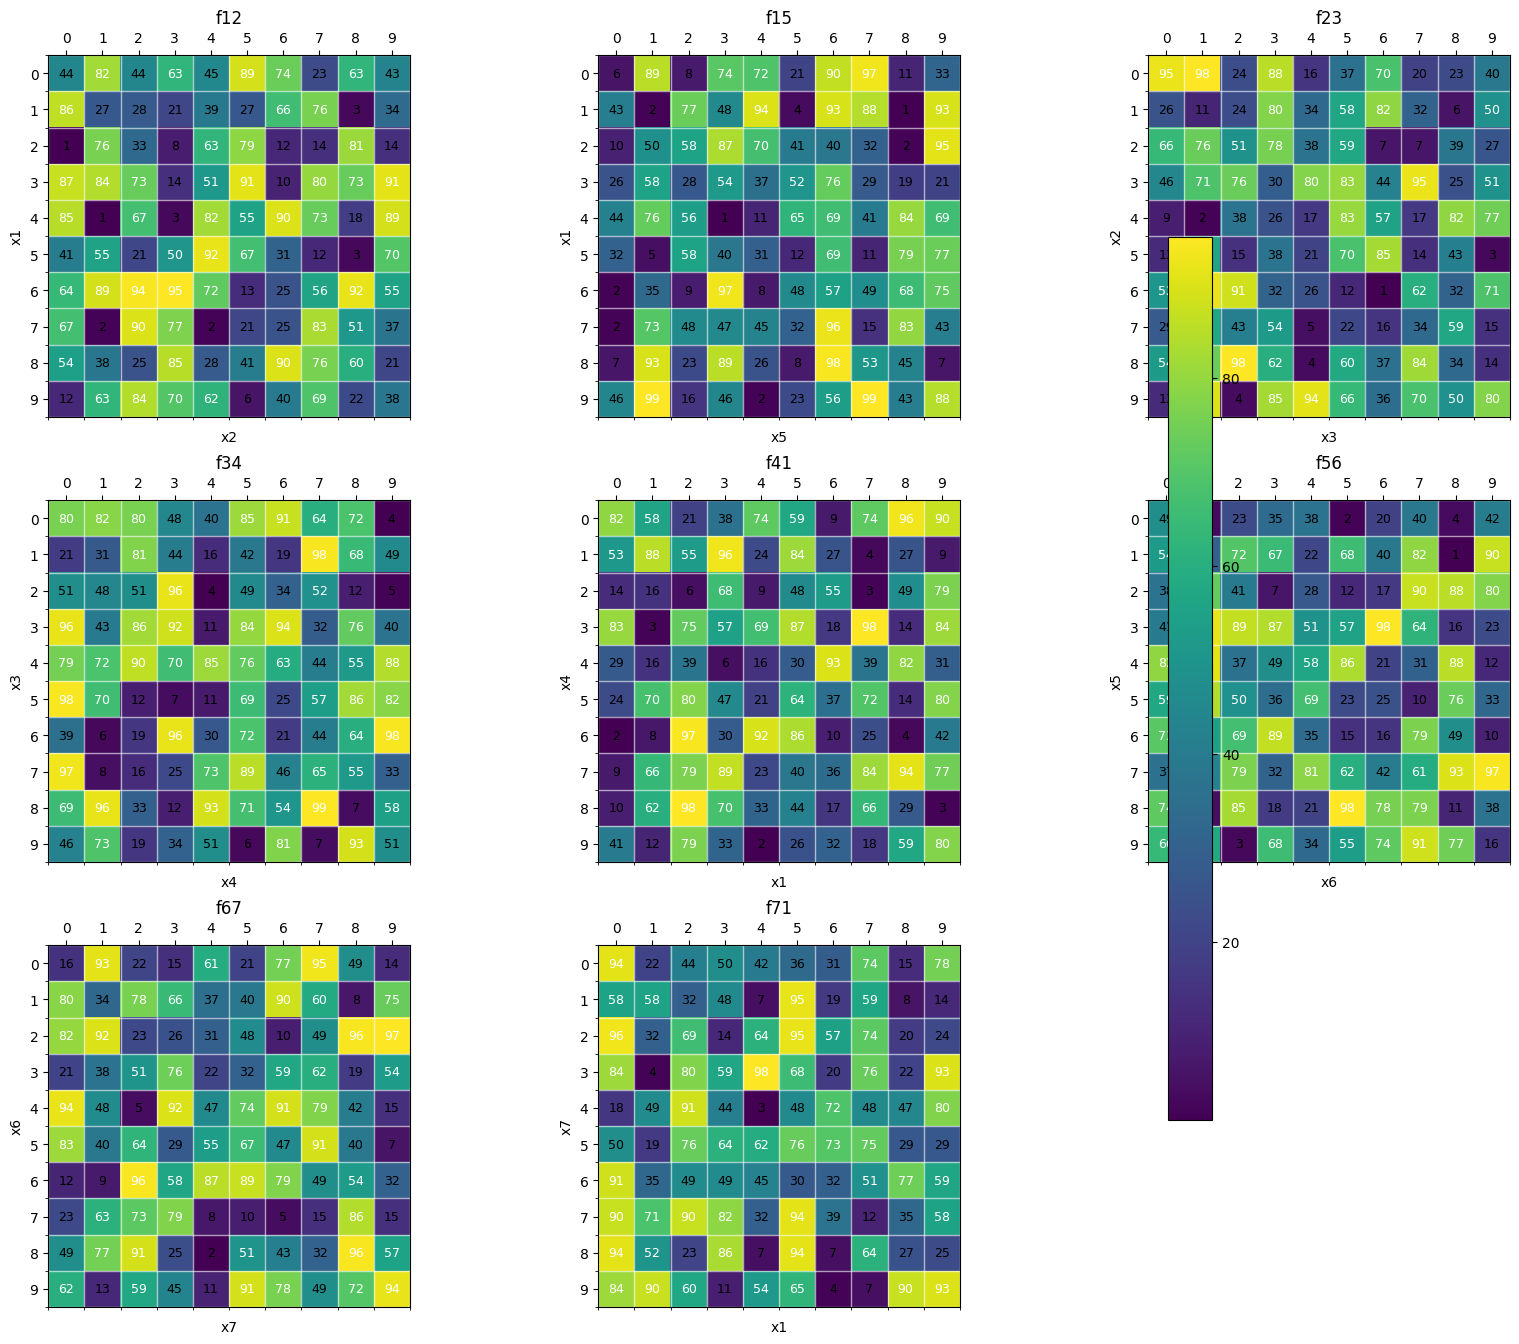

In [3]:
import pickle
from propflow.engines import Engine,SplitEngine
from propflow.snapshots import SnapshotVisualizer
engine_split = SplitEngine(pickle.loads(pickle.dumps(lemniscate_fg)))
engine_split.run(max_iter=50)
viz = SnapshotVisualizer(engine_split.snapshots)
viz.plot_assignment_heatmap()
viz.plot_argmin_per_variable(layout = "combined")


engine = Engine(factor_graph= pickle.loads(pickle.dumps(lemniscate_fg)))
engine.run(max_iter=50)
viz2 = SnapshotVisualizer(engine.snapshots)
viz2.plot_assignment_heatmap()
viz2.plot_argmin_per_variable(layout = "combined")
viz2.show_cost_tables()
